In [31]:
!gdown 1OFgBOb4B1j32uK26vf5urkp8rqVmD_Wf

Downloading...
From: https://drive.google.com/uc?id=1OFgBOb4B1j32uK26vf5urkp8rqVmD_Wf
To: /content/titanic.zip
100% 7.00k/7.00k [00:00<00:00, 17.1MB/s]


In [32]:
!unzip -q titanic.zip

replace titanic_modified_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

path = '/content/titanic_modified_dataset.csv'
df = pd.read_csv(path, index_col= 'PassengerId')
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [35]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.359147,0.936027,0.383838
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.638707,1.725341,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,16.000000,1.000000


In [36]:
dataset = df.to_numpy().astype('float64')
X, y = dataset[:, :-1], dataset[:, -1]

X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [37]:
val_size = 0.2
test_size = 0.125

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=val_size, random_state=2, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=2, shuffle=True)

In [38]:
normalizer = StandardScaler()
normalizer.fit(X_train)

X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [39]:
def sigmoid(z):
  return 1. / (1. + np.exp(-z))

In [40]:
def predict(X, theta):
  return sigmoid(np.dot(X, theta))

def calculate_loss(y, y_hat):
  return -np.mean(y * np.log(y_hat + 1e-7) + (1-y) * np.log(1 - y_hat + 1e-7))

def compute_gradient(X, y, y_hat):
  return np.dot(X.T, y_hat - y) / X.shape[0]

def update_theta(theta, gradient, learning_rate):
  return theta - learning_rate * gradient

def compute_accuracy(y, y_pred):
  y_pred = np.where(y_pred > 0.5, 1, 0)
  return np.mean(y_pred == y)


In [41]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []
NUM_EPOCHS = 100
learning_rate = 0.01
batch_size = 16
np.random.seed(2)
theta = np.random.randn(X_train.shape[1])
for e in range(NUM_EPOCHS):
  train_batch_losses, train_batch_accs = [], []
  val_batch_losses, val_batch_accs = [], []

  for i in range(0, X_train.shape[0], batch_size):
    X, y = X_train[i:i+batch_size], y_train[i:i+batch_size]
    y_pred = predict(X, theta)
    loss = calculate_loss(y, y_pred)
    grad = compute_gradient(X, y, y_pred)
    theta = update_theta(theta, grad, learning_rate)

    acc = compute_accuracy(y, y_pred)

    train_batch_losses.append(loss)
    train_batch_accs.append(acc)

    y_val_pred = predict(X_val, theta)
    val_loss = calculate_loss(y_val, y_val_pred)
    val_acc = compute_accuracy(y_val, y_val_pred)

  train_losses.append(np.mean(train_batch_losses))
  train_accs.append(np.mean(train_batch_accs))
  val_losses.append(val_loss)
  val_accs.append(val_acc)
  print(f'Epoch {e+1}/{NUM_EPOCHS} | Train Loss: {train_losses[-1]:.2f} | Train Acc: {train_accs[-1]:.2f} | Val Loss: {val_losses[-1]:.2f} | Val Acc: {val_accs[-1]:.2f}')

Epoch 1/100 | Train Loss: 2.59 | Train Acc: 0.29 | Val Loss: 2.62 | Val Acc: 0.30
Epoch 2/100 | Train Loss: 2.33 | Train Acc: 0.30 | Val Loss: 2.36 | Val Acc: 0.30
Epoch 3/100 | Train Loss: 2.09 | Train Acc: 0.30 | Val Loss: 2.13 | Val Acc: 0.30
Epoch 4/100 | Train Loss: 1.87 | Train Acc: 0.31 | Val Loss: 1.91 | Val Acc: 0.31
Epoch 5/100 | Train Loss: 1.67 | Train Acc: 0.35 | Val Loss: 1.71 | Val Acc: 0.31
Epoch 6/100 | Train Loss: 1.49 | Train Acc: 0.38 | Val Loss: 1.54 | Val Acc: 0.34
Epoch 7/100 | Train Loss: 1.33 | Train Acc: 0.42 | Val Loss: 1.39 | Val Acc: 0.39
Epoch 8/100 | Train Loss: 1.20 | Train Acc: 0.45 | Val Loss: 1.26 | Val Acc: 0.43
Epoch 9/100 | Train Loss: 1.08 | Train Acc: 0.50 | Val Loss: 1.14 | Val Acc: 0.48
Epoch 10/100 | Train Loss: 0.98 | Train Acc: 0.55 | Val Loss: 1.05 | Val Acc: 0.52
Epoch 11/100 | Train Loss: 0.89 | Train Acc: 0.59 | Val Loss: 0.97 | Val Acc: 0.58
Epoch 12/100 | Train Loss: 0.82 | Train Acc: 0.62 | Val Loss: 0.90 | Val Acc: 0.61
Epoch 13/100 

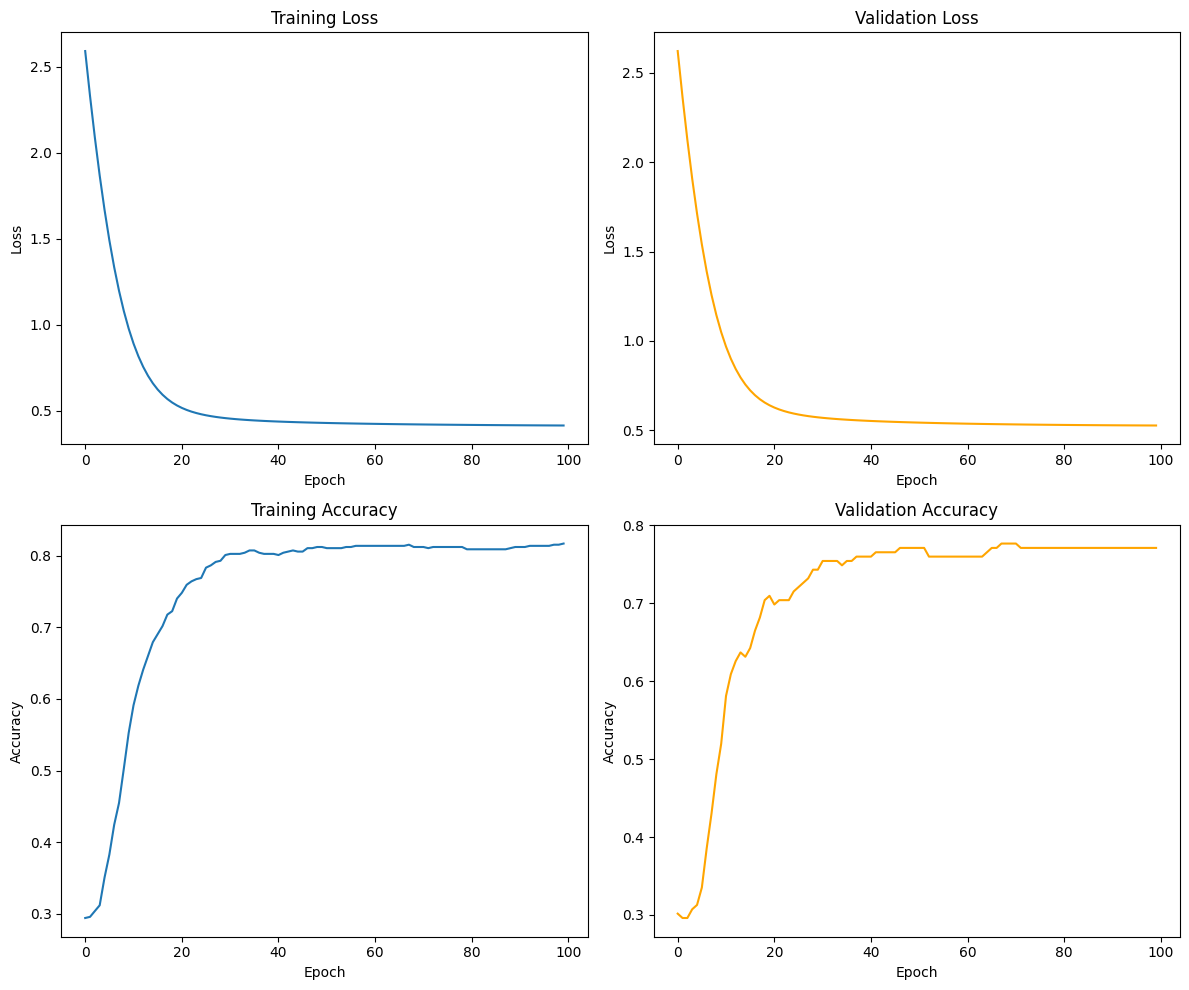

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot training loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Plot validation loss
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Plot training accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Plot validation accuracy
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

# Show the plots
plt.tight_layout()
plt.show()

In [43]:
y_test_pred = predict(X_test, theta)
test_acc = compute_accuracy(y_test, y_test_pred)
print(f'Test Accuracy: {test_acc:.2f}')

Test Accuracy: 0.79


In [44]:
!gdown 1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j

Downloading...
From: https://drive.google.com/uc?id=1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j
To: /content/twitter_sentiment_analysis_2cls_dataset.zip
100% 471k/471k [00:00<00:00, 116MB/s]


In [45]:
!unzip -q twitter_sentiment_analysis_2cls_dataset.zip

replace sentiment_analysis.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [46]:
import re
import nltk
import matplotlib.pyplot as plt

from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [47]:
df = pd.read_csv('/content/sentiment_analysis.csv')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [48]:
def text_normalization(text):
  # Retweet old acronym "RT" removal
  text = re.sub(r'^RT[\s]+', '', text)

  # Hyperlinks removal
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

  # Hashtags removal
  text = re.sub(r'#', '', text)

  # Punctuation removal
  text = re.sub(r'[^\w\s]', '', text)
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
  return tokenizer.tokenize(text)

In [49]:
def get_freq(df):
  freqs = defaultdict(lambda: 0)
  for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']
    tokens = text_normalization(tweet)
    for token in tokens:
      pair = (token, label)
      freqs[pair] += 1
  return freqs


In [50]:
freqs = get_freq(df)

In [51]:
X = []
y = []
for i, row in df.iterrows():
  tweet = row['tweet']
  label = row['label']
  tokens = text_normalization(tweet)
  x_i = np.zeros(3)
  x_i[0] = 1.
  for token in tokens:
    x_i[1] += freqs[(token, 0)]
    x_i[2] += freqs[(token, 1)]
  X.append(x_i)
  y.append(label)

X = np.array(X)
y = np.array(y)

In [52]:
from sklearn.model_selection import train_test_split

val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

# First split to create validation set from the main dataset
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Second split to create test set from the training set
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)


In [53]:
normalization = StandardScaler()
X_train[:, 1:] = normalization.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalization.transform(X_val[:, 1:])
X_test[:, 1:] = normalization.transform(X_test[:, 1:])

In [71]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
  return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):
  return sigmoid(np.dot(X, theta))

def compute_gradient(X, y, y_hat):
  return np.dot(X.T, y_hat - y) / y.size

def update_theta(theta, gradient, lr):
  return theta - lr * gradient

def compute_accuracy(y, y_pred):
  y_pred = np.where(y_pred > 0.5, 1, 0)
  return np.mean(y_pred == y)

In [59]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []
NUM_EPOCHS = 200
learning_rate = 0.01
batch_size = 128
np.random.seed(2)
theta = np.random.randn(X_train.shape[1])
for e in range(NUM_EPOCHS):
  train_batch_losses, train_batch_accs = [], []
  val_batch_losses, val_batch_accs = [], []

  for i in range(0, X_train.shape[0], batch_size):
    X, y = X_train[i:i+batch_size], y_train[i:i+batch_size]
    y_pred = predict(X, theta)
    loss = calculate_loss(y, y_pred)
    grad = compute_gradient(X, y, y_pred)
    theta = update_theta(theta, grad, learning_rate)

    acc = compute_accuracy(y, y_pred)

    train_batch_losses.append(loss)
    train_batch_accs.append(acc)

    y_val_pred = predict(X_val, theta)
    val_loss = calculate_loss(y_val, y_val_pred)
    val_acc = compute_accuracy(y_val, y_val_pred)

  train_losses.append(np.mean(train_batch_losses))
  train_accs.append(np.mean(train_batch_accs))
  val_losses.append(val_loss)
  val_accs.append(val_acc)
  print(f'Epoch {e+1}/{NUM_EPOCHS} | Train Loss: {train_losses[-1]:.2f} | Train Acc: {train_accs[-1]:.2f} | Val Loss: {val_losses[-1]:.2f} | Val Acc: {val_accs[-1]:.2f}')

Epoch 1/200 | Train Loss: 1.41 | Train Acc: 0.33 | Val Loss: 1.33 | Val Acc: 0.31
Epoch 2/200 | Train Loss: 1.24 | Train Acc: 0.33 | Val Loss: 1.18 | Val Acc: 0.34
Epoch 3/200 | Train Loss: 1.10 | Train Acc: 0.36 | Val Loss: 1.05 | Val Acc: 0.38
Epoch 4/200 | Train Loss: 0.99 | Train Acc: 0.41 | Val Loss: 0.95 | Val Acc: 0.45
Epoch 5/200 | Train Loss: 0.90 | Train Acc: 0.48 | Val Loss: 0.87 | Val Acc: 0.56
Epoch 6/200 | Train Loss: 0.82 | Train Acc: 0.62 | Val Loss: 0.80 | Val Acc: 0.67
Epoch 7/200 | Train Loss: 0.77 | Train Acc: 0.70 | Val Loss: 0.75 | Val Acc: 0.70
Epoch 8/200 | Train Loss: 0.72 | Train Acc: 0.70 | Val Loss: 0.70 | Val Acc: 0.70
Epoch 9/200 | Train Loss: 0.69 | Train Acc: 0.70 | Val Loss: 0.67 | Val Acc: 0.70
Epoch 10/200 | Train Loss: 0.66 | Train Acc: 0.70 | Val Loss: 0.65 | Val Acc: 0.70
Epoch 11/200 | Train Loss: 0.63 | Train Acc: 0.70 | Val Loss: 0.62 | Val Acc: 0.70
Epoch 12/200 | Train Loss: 0.62 | Train Acc: 0.70 | Val Loss: 0.61 | Val Acc: 0.70
Epoch 13/200 

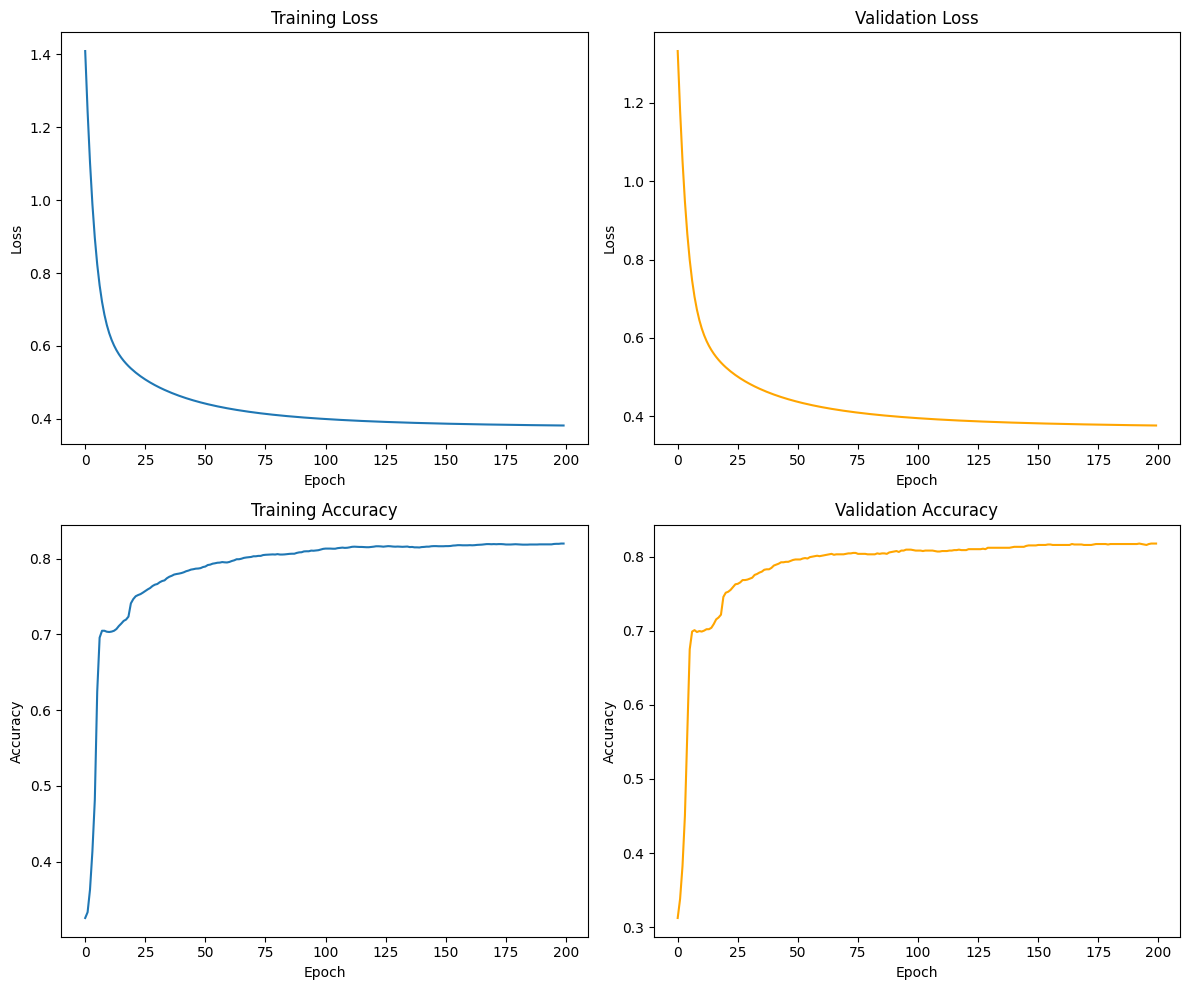

In [60]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot training loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Plot validation loss
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Plot training accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Plot validation accuracy
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

# Show the plots
plt.tight_layout()
plt.show()

In [61]:
test_acc = compute_accuracy(y_test, predict(X_test, theta))
print(f'Test Accuracy: {test_acc:.2f}')

Test Accuracy: 0.84


In [62]:
X = np.array([[22.3,-1.5, 1.1, 1]])
theta = np.array([0.1,-0.15, 0.3,-0.2])
predict(X, theta)

array([0.92988994])

In [64]:
y = np.array([1, 0, 0, 1])
y_hat = np.array([0.8, 0.75, 0.3, 0.95])
compute_loss(y_hat, y)

0.5043515376900958

In [74]:
X = np.array([[1, 2], [2, 1], [1, 1], [2, 2]])
y_true = np.array([0, 1, 0, 1])
y_pred = np.array([0.25, 0.75, 0.4, 0.8])
compute_gradient(X, y_true, y_pred)

array([-0.0625,  0.0625])

In [66]:
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.85, 0.35, 0.9, 0.75])
compute_accuracy(y_true, y_pred)

1.0

In [72]:
def compute_gradient(X, y_true, y_pred):
 gradient = np.dot(X.T, (y_pred- y_true)) / y_true.size
 return gradient

In [73]:
X = np.array([[1, 3], [2, 1], [3, 2], [1, 2]])
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.7, 0.4, 0.6, 0.85])
compute_gradient(X, y_true, y_pred)

array([-0.2125, -0.4   ])